In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
(x_trn, y_trn), (x_tst, y_tst) = mnist.load_data()
print(x_trn.shape)
print(x_tst.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
n_classes = 10
img_size_x = 28
img_size_y = 28
num_features = img_size_x * img_size_y

n_hidden_1 = 64
n_hidden_2 = 24

In [4]:
x_train = np.array(x_trn, np.float32) / 255.
x_test = np.array(x_tst, np.float32) / 255.

y_train = keras.utils.to_categorical(y_trn, n_classes)
y_test = keras.utils.to_categorical(y_tst, n_classes)

print(y_trn[1])
print(y_train[1])

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [5]:
model = Sequential()
model.add(Flatten(input_shape = (img_size_x, img_size_y, 1)))
model.add(Dense(n_hidden_1, activation = 'sigmoid'))
model.add(Dense(n_hidden_2, activation = 'sigmoid'))
model.add(Dense(n_classes, activation = 'softmax'))


In [6]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1)
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizer, metrics= ['accuracy'])

In [7]:
history = model.fit(x_train, y_train, batch_size = 128, epochs = 10,
                    validation_split = 0.2, verbose = 1)

model.evaluate(x_test, y_test)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 2.0384 - accuracy: 0.4103 - val_loss: 1.5614 - val_accuracy: 0.6432
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 1.1746 - accuracy: 0.6925 - val_loss: 0.8885 - val_accuracy: 0.7887
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.7819 - accuracy: 0.8043 - val_loss: 0.6373 - val_accuracy: 0.8498
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.5916 - accuracy: 0.8571 - val_loss: 0.4985 - val_accuracy: 0.8811
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.4821 - accuracy: 0.8798 - val_loss: 0.4214 - val_accuracy: 0.8930
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.4187 - accuracy: 0.8908 - val_loss: 0.3759 - val_accuracy: 0.8994
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3786 - accuracy: 0.8976 - val_loss: 0.3438 - val_accuracy: 0.9061
Epoch 

[0.2942732572555542, 0.9204000234603882]

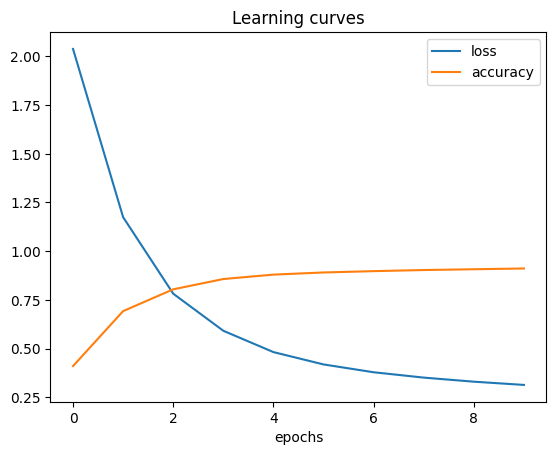

In [8]:
plt.title('Learning curves')
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

1/1 [==============================] - 0s 164ms/step


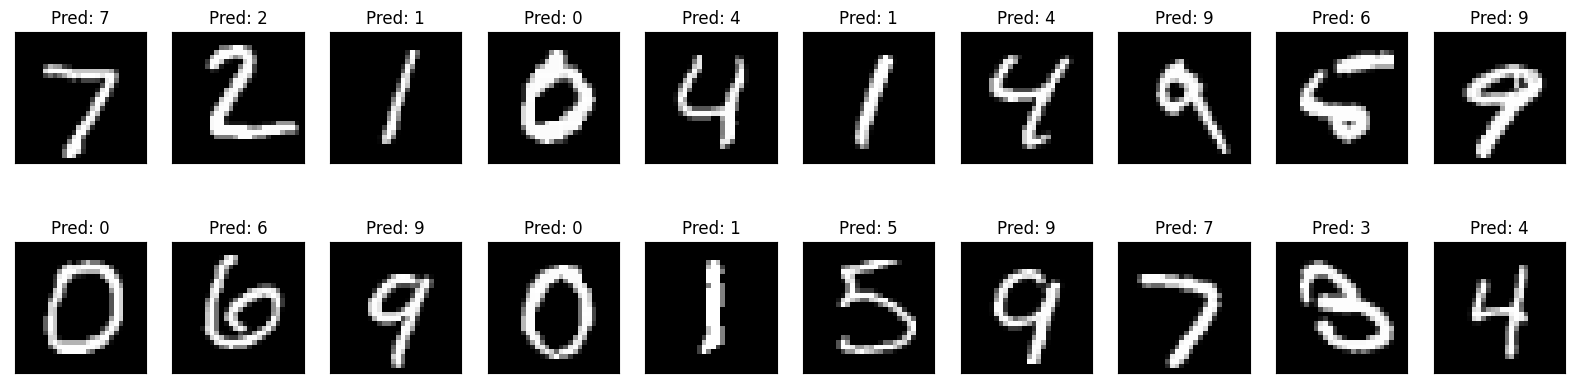

In [9]:
test_imgs = x_test[:20]
preds = model.predict(test_imgs)

fig = plt.figure(figsize = (20, 5))
for i in np.arange(20):
    ax = fig.add_subplot(2, 10, i + 1, xticks = [], yticks = [])
    plt.imshow(np.reshape(test_imgs[i], [28, 28]), cmap = 'gray', interpolation = 'none')
    ax.set_title("Pred: {}".format(np.argmax(preds[i])))

In [10]:
model2 = Sequential()
model2.add(Flatten(input_shape = (img_size_x, img_size_y, 1)))
model2.add(Dense(48, activation = 'sigmoid'))
model2.add(Dense(24, activation = 'sigmoid'))
model2.add(Dense(16, activation = 'sigmoid'))
model2.add(Dense(n_classes, activation = 'softmax'))

In [11]:
optimizer2 = tf.keras.optimizers.SGD(learning_rate = 0.1)
model2.compile(loss = 'categorical_crossentropy',
              optimizer = optimizer2, metrics= ['accuracy'])

In [12]:
history2 = model2.fit(x_train, y_train, batch_size = 128, epochs = 10,
                    validation_split = 0.2, verbose = 1)

model2.evaluate(x_test, y_test)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 2.2933 - accuracy: 0.1252 - val_loss: 2.2784 - val_accuracy: 0.1088
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 2.2363 - accuracy: 0.2250 - val_loss: 2.1542 - val_accuracy: 0.2482
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 1.9397 - accuracy: 0.3202 - val_loss: 1.6853 - val_accuracy: 0.4073
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 1.4892 - accuracy: 0.4559 - val_loss: 1.3347 - val_accuracy: 0.5083
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 1.2725 - accuracy: 0.5251 - val_loss: 1.1810 - val_accuracy: 0.5754
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 1.1383 - accuracy: 0.6048 - val_loss: 1.0513 - val_accuracy: 0.6700
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 1.0069 - accuracy: 0.6925 - val_loss: 0.9116 - val_accuracy: 0.7477
Epoch 

[0.5823590755462646, 0.8586999773979187]

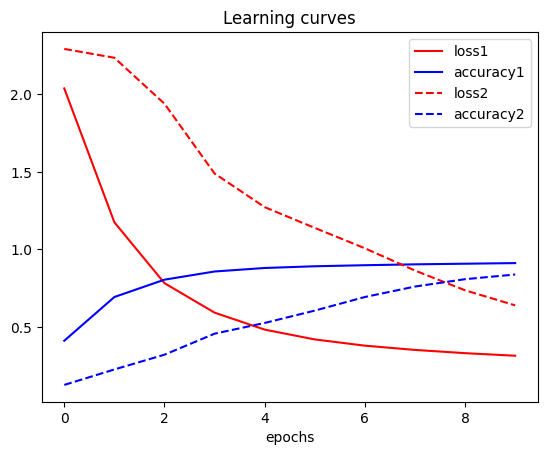

In [13]:
plt.title('Learning curves')
plt.plot(history.history['loss'], label = 'loss1', c = 'red', ls = 'solid')
plt.plot(history.history['accuracy'], label = 'accuracy1', c = 'blue', ls = 'solid')
plt.plot(history2.history['loss'], label = 'loss2', c = 'red', ls = 'dashed')
plt.plot(history2.history['accuracy'], label = 'accuracy2', c = 'blue', ls = 'dashed')
plt.xlabel('epochs')
plt.legend()
plt.show()